In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
from matplotlib import pyplot as plt
import numpy as np
from mlp_helper import draw_neural_net, return_weights_notation

# Pruebas a realizar
- hidden units 2, 3, 6
- Activation sigmoid y relu

# Dataset

In [111]:
np.random.seed(10)
# X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, 200)

In [112]:
sigma = 1
y = np.abs(X) + np.random.normal(0, sigma, len(X))
# y = np.cos(X/4) + np.random.normal(0, 0.01, len(X))

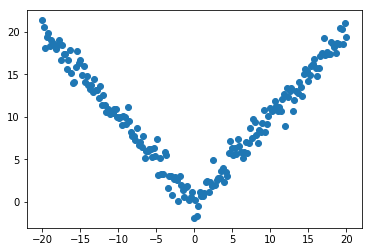

In [113]:
plt.scatter(X, y)

# Model

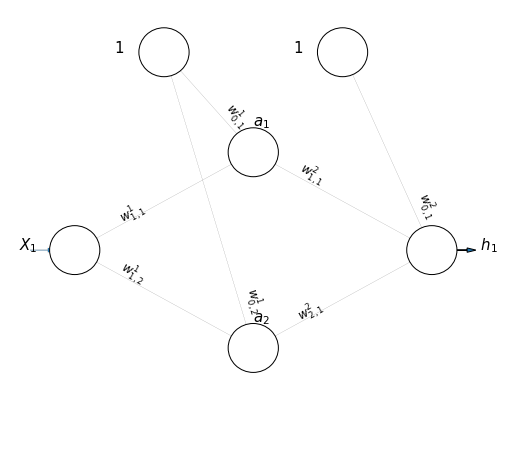

In [122]:
input_dim = 1
hidden_units = 2
outputs = 1
activation = 'relu'

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,outputs]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [123]:
from keras.models import Sequential
from keras.layers import Dense

In [124]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [125]:
from keras.optimizers import Adam, SGD, rmsprop
model.compile(Adam(lr=0.1), loss='mse', metrics=['mse'])

# Entrenamiento del modelo

In [126]:
model.fit(X, y, verbose=0, epochs=500)

In [127]:
print(model.metrics_names)
print(model.evaluate(X, y))

['loss', 'mean_squared_error']
200/200 [==============================] - 0s 2ms/step
[24.67472764968872, 24.67472764968872]


In [128]:
y_pred = model.predict(X)

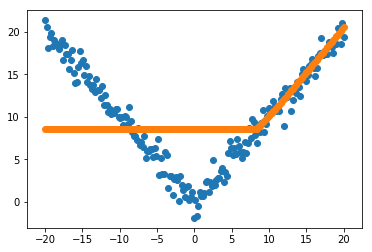

In [129]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

In [33]:
model.get_weights()

[array([[-2.332448 , -0.8757608,  0.5736062,  0.8220943, -1.4519638,
         -1.416387 ]], dtype=float32),
 array([  3.6210797, -13.5625105,  -4.487569 , -13.39868  ,  -4.8432345,
        -11.80205  ], dtype=float32),
 array([[-2.637191 ],
        [ 7.2496376],
        [ 9.376644 ],
        [ 6.5018964],
        [ 5.499027 ],
        [ 5.1924872]], dtype=float32),
 array([3.1050715], dtype=float32)]

In [34]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

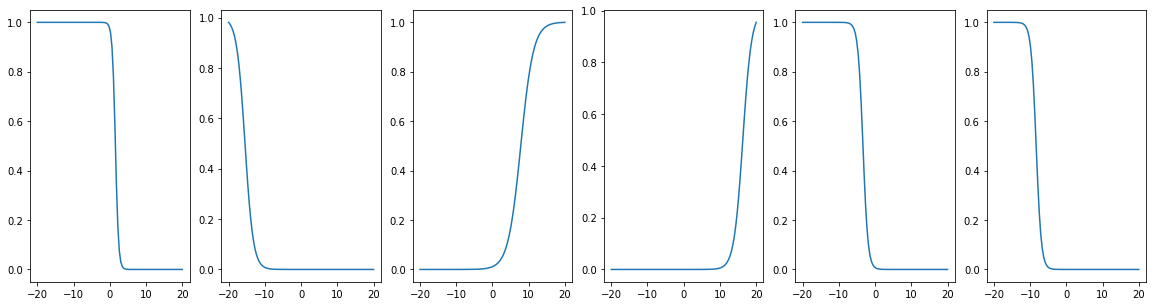

In [35]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []
preds = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation, input_dim=1)
    sub_models.append(sub_model)
    preds.append(sub_model.predict(X))
    ax[i].plot(X, preds[i])

# Ejemplo con hidden_units=3 Activation sigmoid

![sigmoid_aprox_3hidden.png](sigmoid_aprox_3hidden.png)
![sigmoid_aprox_3hidden_all.png](sigmoid_aprox_3hidden_all.png)